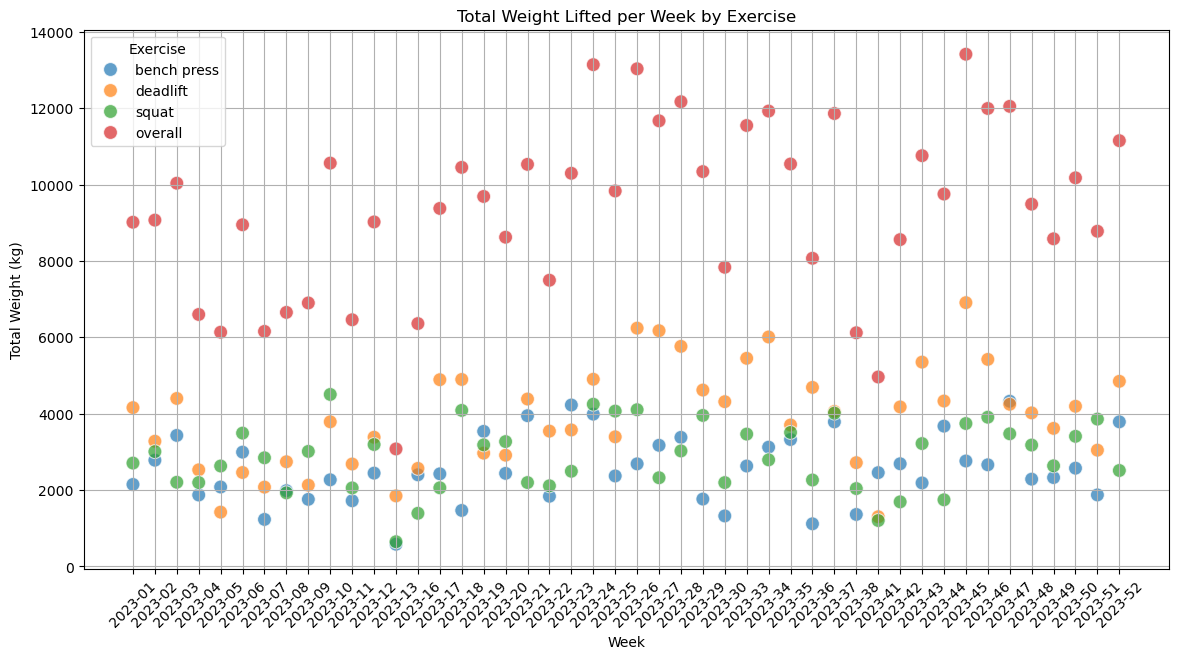

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dummy data from the CSV file
dummy_data = pd.read_csv('data/dummy_training_data.csv')

# Convert the date column to datetime format
dummy_data['date'] = pd.to_datetime(dummy_data['date'])

# Extract week and year from the date column
dummy_data['year_week'] = dummy_data['date'].dt.strftime('%Y-%U')

# Calculate the total weight lifted per week per exercise
total_weight_per_week_exercise = dummy_data.groupby(['year_week', 'exercise'])['total_weight'].sum().reset_index()

# Calculate the total weight lifted per week overall
total_weight_per_week_overall = dummy_data.groupby(['year_week'])['total_weight'].sum().reset_index()
total_weight_per_week_overall['exercise'] = 'overall'

# Concatenate the two dataframes
total_weight_per_week = pd.concat([total_weight_per_week_exercise, total_weight_per_week_overall])

# Plot the data
plt.figure(figsize=(14, 7))
sns.scatterplot(x='year_week', y='total_weight', hue='exercise', data=total_weight_per_week, s=100, alpha=0.7)
plt.title('Total Weight Lifted per Week by Exercise')
plt.xlabel('Week')
plt.ylabel('Total Weight (kg)')
plt.legend(title='Exercise')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
